# Исследование сервиса аренды самокатов "GoFast"

## Описание проекта

Нам передали данные о некоторых пользователях из нескольких городов популярного сервиса аренды самокатов 'GoFast', а также об их поездках. Требуется проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса 'GoFast' пользуются мобильным приложением.

Сервисом можно пользоваться:
* без подписки 
    абонентская плата отсутствует;
    стоимость одной минуты поездки — 8 рублей;
    стоимость старта (начала поездки) — 50 рублей;

* с подпиской Ultra 
    абонентская плата — 199 рублей в месяц;
    стоимость одной минуты поездки — 6 рублей;
    стоимость старта — бесплатно.

## Описание данных

В основных данных есть информация о пользователях, их поездках и подписках.

#### Пользователи — users_go.csv

* user_id - уникальный идентификатор пользователя;
* name - имя пользователя;
* age - возраст;
* city - город;
* subscription_type - тип подписки (free, ultra).

#### Поездки — rides_go.csv

* user_id - уникальный идентификатор пользователя;
* distance - расстояние, которое пользователь проехал в текущей сессии (в метрах);
* duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
* date - дата совершения поездки.

#### Подписки — subscriptions_go.csv

* subscription_type	- тип подписки;
* minute_price	- стоимость одной минуты поездки по данной подписке;
* start_ride_price	- стоимость начала поездки;
* subscription_fee	- стоимость ежемесячного платежа.

<a id="Задачи_исследования"></a>

## Задачи исследования

### [Этап 1. Загрузка и изучение данных](#Этап_1)

* [1.1 Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы.](#Читаем_данные)
* [1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.](#Изучаем_данные)

### [Этап 2. Предобработка данных](#Этап_2)

* [2.1 Приведите столбец date к типу даты pandas.](#Преоброзование_типов)
* [2.2 Создайте новый столбец с номером месяца на основе столбца date.](#Столбец_с_месяцем)
* [2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.](#Пропуски_дубли)

### [Этап 3. Исследовательский анализ данных](#Этап_3)

Опишите и визуализируйте общую информацию о пользователях и поездках:
* [3.1 частота встречаемости городов;](#Города)
* [3.2 соотношение пользователей с подпиской и без подписки;](#Соотношение)
* [3.3 возраст пользователей;](#Возраст)
* [3.4 расстояние, которое пользователь преодолел за одну поездку;](#Расстояние)
* [3.5 продолжительность поездок.](#Продолжительность)

### [Этап 4. Объединение данных](#Этап_4)

* [4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge();](#Объединение)
* [4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:](#Новые_дф)
    * c данными о пользователях без подписки;
    * с данными о пользователях с подпиской.
* [4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.](#Визуализируем)

### [Этап 5. Подсчёт выручки](#Этап_5)

* [5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц;](#Агрегируем)
* [5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.](#Кэш)

### [Этап 6. Проверка гипотез](#Этап_6)

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.
* [6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки;](#Гипотеза_1)
* [6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы;](#Гипотеза_2)
* [6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод;](#Гиротеза_3)
* [6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?](#Гипотеза_4)

<a id="Этап_1"></a>

## Этап 1: Загрузить и изучить данные 
#### Подключение библиотек

[Вернуться к задачам исследования](#Задачи_исследования)

In [1]:
import pandas as pd                                           # Библиотека для работы с данными, предоставляет функции и структуры данных, такие как DataFrame и Series.
import numpy as np                                            # Фундаментальная библиотека для научных вычислений с поддержкой многомерных массивов и матриц.
import seaborn as sns                                         # Библиотека для визуализации данных, основанная на Matplotlib.
from matplotlib import pyplot as plt                          # Библиотека для создания статических, анимированных и взаимодействующих визуализаций данных.
import plotly.express as px                                   # Библиотека является частью экосистемы Plotly для визуализации данных в Python.
import warnings                                               # Модуль для управления предупреждениями.
from scipy import stats                                       # Импорт модуля stats из библиотеки scipy для работы со статистическими методами
from scipy.stats import mannwhitneyu                          # Импорт функции mannwhitneyu из модуля stats для выполнения теста Манна-Уитни
from tabulate import tabulate


# Настрйоки отображения
# Устанавливаем формат отображения чисел с двумя знаками после запятой 
pd.options.display.float_format = '{:.2f}'.format

# Устанавливает фильтр предупреждений
warnings.filterwarnings("ignore")

<a id="Читаем_данные"></a>

#### 1.1 Загрузка данных из файла

[Вернуться к задачам исследования](#Задачи_исследования)

In [2]:
try:
    df_users_go = pd.read_csv('/Users/Edward/Code/DS+/csv/users_go.csv', sep = ',')
    df_rides_go = pd.read_csv('/Users/Edward/Code/DS+/csv/rides_go.csv', sep = ',')
    df_subscriptions_go = pd.read_csv('/Users/Edward/Code/DS+/csv/subscriptions_go.csv', sep = ',')
except:
    df_users_go = pd.read_csv('/datasets/users_go.csv', sep = ',')
    df_rides_go = pd.read_csv('/datasets/rides_go.csv', sep = ',')
    df_subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv', sep = ',')

<a id="Изучаем_данные"></a>

#### 1.2 Изучение данных из файлов

[Вернуться к задачам исследования](#Задачи_исследования)

In [3]:
df_users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
df_users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [5]:
df_rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
df_rides_go.head()

,user_id,distance,duration,date
0,1,4409.92,25.60,2021-01-01
1,1,2617.59,15.82,2021-01-18
2,1,754.16,6.23,2021-04-20
3,1,2694.78,18.51,2021-08-11
4,1,4028.69,26.27,2021-08-28


In [7]:
df_subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


In [8]:
df_subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


### Вывод

Проблемы, которые нужно решить и понять:
* некорректный тип данных date

<a id="Этап_2"></a>

## Этап 2. Предобработка данных

<a id="Преоброзование_типов"></a>

#### 2.1 Приведем столбец date к типу даты pandas

[Вернуться к задачам исследования](#Задачи_исследования)

In [9]:
# Приведим столбец date к типу даты pandas
df_rides_go['date'] = pd.to_datetime(df_rides_go['date'])
df_rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


<a id="Столбец_с_месяцем"></a>

#### 2.2 Создаем новый столбец с номером месяца на основе столбца date

[Вернуться к задачам исследования](#Задачи_исследования)

In [10]:
# Создаем новый столбец с номером месяца на основе столбца date
df_rides_go['month'] = df_rides_go['date'].dt.month_name()
df_rides_go.head()

,user_id,distance,duration,date,month
0,1,4409.92,25.60,2021-01-01,January
1,1,2617.59,15.82,2021-01-18,January
2,1,754.16,6.23,2021-04-20,April
3,1,2694.78,18.51,2021-08-11,August
4,1,4028.69,26.27,2021-08-28,August


<a id="Пропуски_дубли"></a>

#### 2.3 Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.

[Вернуться к задачам исследования](#Задачи_исследования)

In [11]:
# Проверим наличие пропущенных значений в df_users_go
print("Пропущенные значения в df_users_go:")
print(df_users_go.isnull().sum().sort_values().to_string())
print()

# Проверим наличие пропущенных значений в df_rides_go
print("Пропущенные значения в df_rides_go:")
print(df_rides_go.isnull().sum().sort_values().to_string())
print()

# Проверим наличие пропущенных значений в df_subscriptions_go
print("Пропущенные значения в df_subscriptions_go:")
print(df_subscriptions_go.isnull().sum().sort_values().to_string())

Пропущенные значения в df_users_go:
user_id              0
name                 0
age                  0
city                 0
subscription_type    0

Пропущенные значения в df_rides_go:
user_id     0
distance    0
duration    0
date        0
month       0

Пропущенные значения в df_subscriptions_go:
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0


#### Чекним дубликаты

In [12]:
# Проверим наличие дубликатов в df_users_go
print("Дубликаты в df_users_go:")
print(df_users_go.duplicated().sum())
print()

# Проверим наличие дубликатов в df_rides_go
print("Дубликаты в df_rides_go:")
print(df_rides_go.duplicated().sum())
print()

# Проверим наличие дубликатов в df_subscriptions_go
print("Дубликаты в df_subscriptions_go:")
print(df_subscriptions_go.duplicated().sum())


Дубликаты в df_users_go:
31

Дубликаты в df_rides_go:
0

Дубликаты в df_subscriptions_go:
0


Уникальный идентификатор пользователя на то и уникальный...

In [13]:
df_users_go['user_id'].duplicated().sum()

31

In [14]:
# Дропним дубли
df_users_go.drop_duplicates(inplace=True)
df_users_go['user_id'].duplicated().sum()

0

### Вывод

* Пропущенных значений не выявлено;
* Были устранены явные дубликаты в колонке 'user_id'.


<a id="Этап_3"></a>

## Этап 3. Исследовательский анализ данных

<a id="Города"></a>

#### 3.1 Опишем и визуализируем частоту встречаемости городов

[Вернуться к задачам исследования](#Задачи_исследования)


            Город  Частота встречаемости
0       Пятигорск                    219
1    Екатеринбург                    204
2  Ростов-на-Дону                    198
3       Краснодар                    193
4            Сочи                    189
5            Омск                    183
6          Тюмень                    180
7          Москва                    168


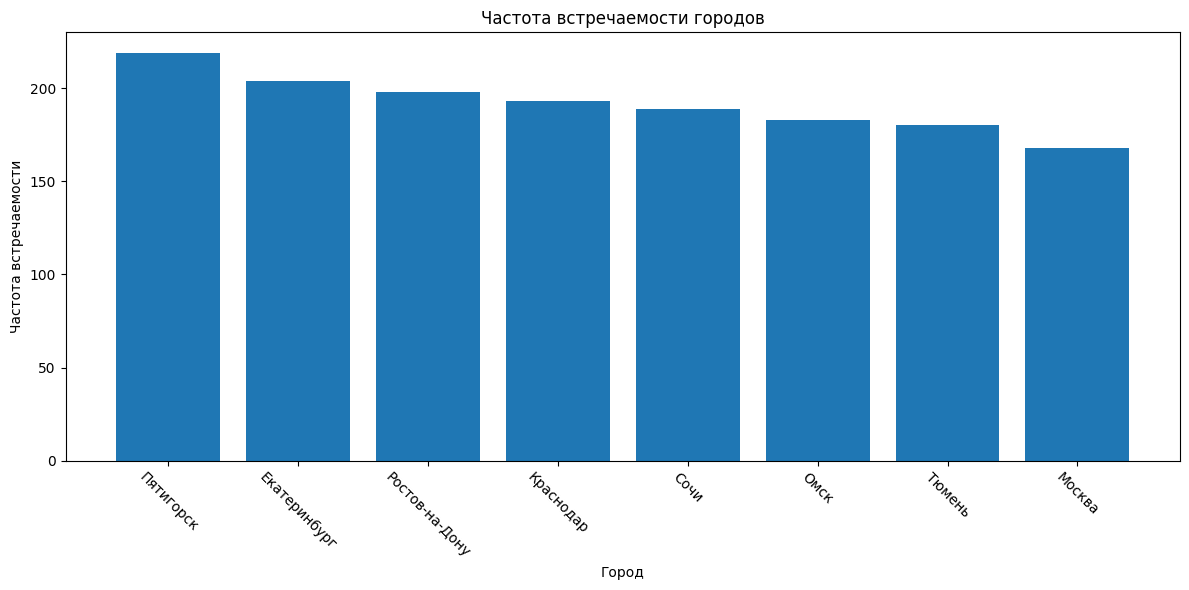

In [15]:
# Создаем сводную таблицу для подсчета частоты встречаемости городов
city_counts = df_users_go['city'].value_counts()

# Создаем DataFrame для городов и их частоты встречаемости
df_city_counts = pd.DataFrame({'Город': city_counts.index, 'Частота встречаемости': city_counts.values})
print(df_city_counts)

# Создаем столбчатую диаграмму
plt.figure(figsize=(12, 6))
plt.bar(df_city_counts['Город'], df_city_counts['Частота встречаемости'])
plt.title('Частота встречаемости городов')
plt.xlabel('Город')
plt.ylabel('Частота встречаемости')
plt.xticks(rotation=-45)
plt.tight_layout()

# Отображаем диаграмму
plt.show()

<a id="Соотношение"></a>

#### 3.2 соотношение пользователей с подпиской и без подписки

[Вернуться к задачам исследования](#Задачи_исследования)


  Тип подписки  Частота встречаемости
0         free                    835
1        ultra                    699


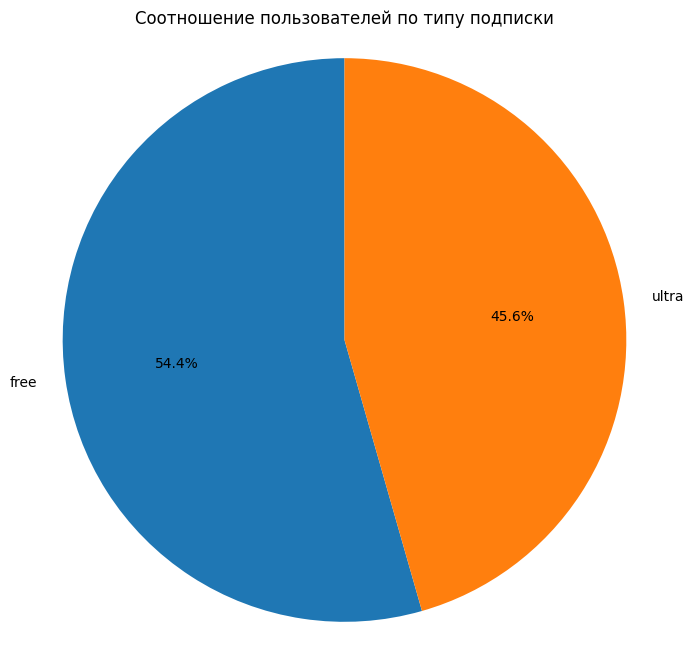

In [16]:
# Подсчитываем количество пользователей с каждым типом подписки
subscription_counts = df_users_go['subscription_type'].value_counts()

# Создаем DataFrame для типов подписки и их частоты встречаемости
df_subscription_counts = pd.DataFrame({'Тип подписки': subscription_counts.index, 'Частота встречаемости': subscription_counts.values})
print(df_subscription_counts)

# Создаем круговую диаграмму
plt.figure(figsize=(8, 8))
plt.pie(df_subscription_counts['Частота встречаемости'], labels=df_subscription_counts['Тип подписки'],
        autopct='%1.1f%%', startangle=90)
plt.title('Соотношение пользователей по типу подписки')
plt.axis('equal')

# Отображаем диаграмму
plt.show()

<a id="Возрас"></a>

#### 3.3 возраст пользователей

[Вернуться к задачам исследования](#Задачи_исследования)

count   1534.00
mean      24.90
std        4.57
min       12.00
25%       22.00
50%       25.00
75%       28.00
max       43.00
Name: age, dtype: float64


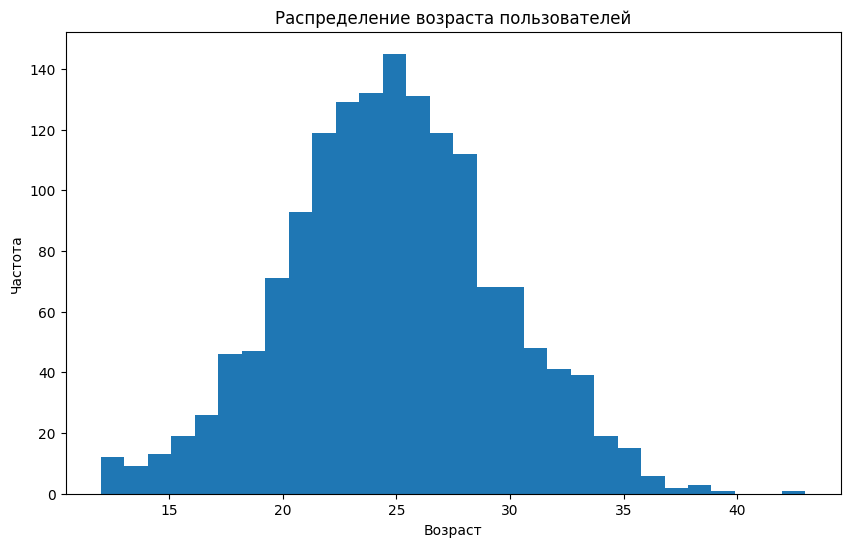

In [17]:
# Выводим статистические показатели
print(df_users_go['age'].describe())

# Создаем гистограмму
plt.figure(figsize=(10, 6))
plt.hist(df_users_go['age'], bins=30)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Частота')

# Отображаем гистограмму
plt.show()

<a id="Расстояние"></a>

#### 3.4 расстояние, которое пользователь преодолел за одну поездку

[Вернуться к задачам исследования](#Задачи_исследования)

       distance
count   1534.00
mean   36167.33
std    13118.52
min     5530.34
25%    26391.08
50%    35494.89
75%    44789.73
max    79325.85


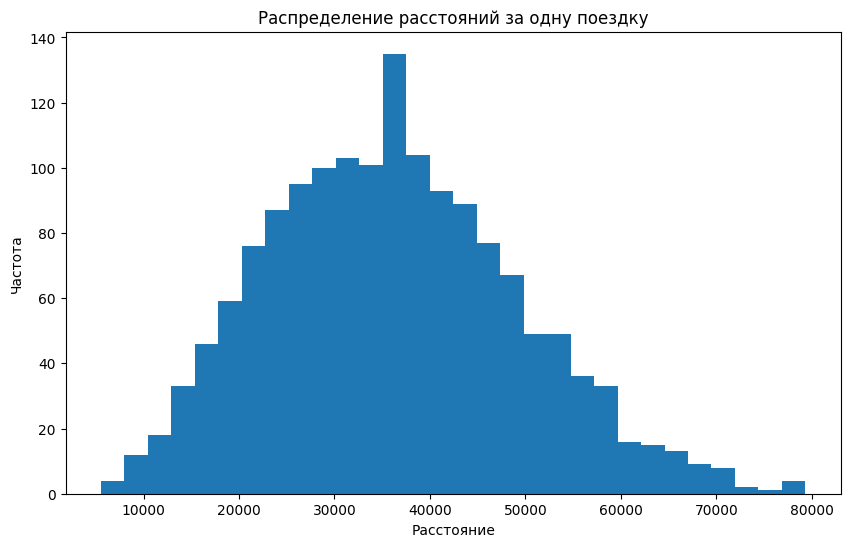

In [18]:
# Создаем сводную таблицу суммарных расстояний по каждому пользователю
tripDistance = df_rides_go.pivot_table(index='user_id', values='distance', aggfunc='sum')

# Описываем статистическое расстояние
statistics = tripDistance.describe()

# Выводим статистические показатели
print(statistics)

# Создаем гистограмму
plt.figure(figsize=(10, 6))
plt.hist(tripDistance['distance'], bins=30)
plt.title('Распределение расстояний за одну поездку')
plt.xlabel('Расстояние')
plt.ylabel('Частота')

# Отображаем гистограмму
plt.show()

Пользователи в среднем преодолевают расстояние около 36167 метров за одну поездку, с разбросом данных от 5530 до 79325 метров. Расстояние может варьироваться в зависимости от конкретной поездки пользователя.

<a id="Продолжительность"></a>

#### 3.5 продолжительность поездок

[Вернуться к задачам исследования](#Задачи_исследования)

       duration
count   1534.00
mean     209.71
std       73.72
min       34.16
25%      156.74
50%      205.40
75%      258.64
max      446.23


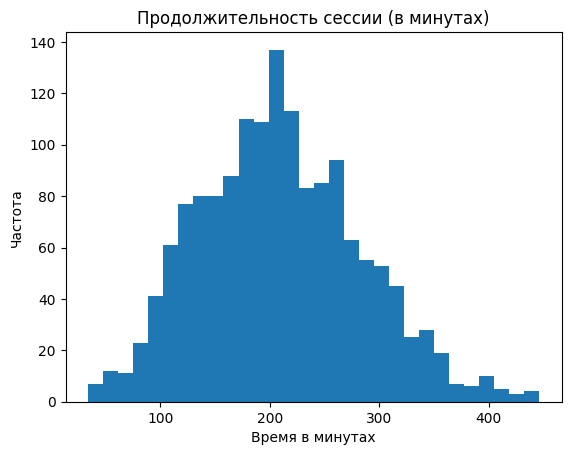

In [19]:
# Создаем сводную таблицу суммарного времени по каждому пользователю
tripTime = df_rides_go.pivot_table(index='user_id', values='duration', aggfunc='sum')

# Описываем статистическое расстояние
statistics = tripTime.describe()

# Выводим статистические показатели
print(statistics)

# Создаем гистограмму с использованием matplotlib
plt.hist(tripTime['duration'], bins=30)
plt.title('Продолжительность сессии (в минутах)')
plt.xlabel('Время в минутах')
plt.ylabel('Частота')

# Отображаем гистограмму с помощью plt.show()
plt.show()

Пользователи в среднем проводят в поездках около 209 минут, с разбросом данных от 34 до 446 минут. Продолжительность поездок может варьироваться в зависимости от конкретной ситуации и предпочтений пользователей.

<a id="Этап_4"></a>

## Этап 4. Объединение данных

<a id="Объединение"></a>

#### 4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge()

[Вернуться к задачам исследования](#Задачи_исследования)

In [20]:
# Объединение данных с помощью метода merge()
df = pd.merge(df_users_go, df_rides_go, on='user_id')
df = pd.merge(df, df_subscriptions_go, on='subscription_type')

# Вывод объединенного датафрейма
df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,January,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,January,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,April,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,August,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,August,6,0,199


In [21]:
# Проверка размерности нового датафрейма
print("Размерность нового датафрейма:", df.shape)

# Проверка размерности старых датафреймов
print("Размерность df_users_go:", df_users_go.shape)
print("Размерность df_rides_go:", df_rides_go.shape)
print("Размерность df_subscriptions_go:", df_subscriptions_go.shape)


Размерность нового датафрейма: (18068, 12)
Размерность df_users_go: (1534, 5)
Размерность df_rides_go: (18068, 5)
Размерность df_subscriptions_go: (2, 4)


В новый дата фрейм вошли все строки и все колонки.

<a id="Новые_дф"></a>

#### 4.2 Создадим еще два датафрейма: с данными о пользователях с подпиской/без подписки

[Вернуться к задачам исследования](#Задачи_исследования)

In [22]:
# Создание датафрейма из df с пользователями без подписки
df_users_without_subscription = df[df['subscription_type'] == 'free'].copy()

# Создание датафрейма из df с пользователями с подпиской
df_users_with_subscription = df[df['subscription_type'] == 'ultra'].copy()

In [23]:
# Вывод созданных датафреймов
print("Данные о пользователях без подписки:")
df_users_without_subscription.head()

Данные о пользователях без подписки:


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,14.94,2021-01-02,January,8,50,0
6501,700,Айдар,22,Омск,free,846.93,16.23,2021-02-01,February,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,20.02,2021-02-04,February,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,9.78,2021-02-10,February,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,17.43,2021-02-14,February,8,50,0


In [24]:
print("\nДанные о пользователях с подпиской:")
df_users_with_subscription.head()


Данные о пользователях с подпиской:


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.60,2021-01-01,January,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.82,2021-01-18,January,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,April,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.51,2021-08-11,August,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.27,2021-08-28,August,6,0,199


<a id="Визуализируем"></a>

#### 4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

[Вернуться к задачам исследования](#Задачи_исследования)

╒═══════════════════════════╤══════════╤═════════╤═════════╤════════╤═════════╤═════════╤═════════╤═════════╕
│ Метрика                   │    count │    mean │     std │    min │     25% │     50% │     75% │     max │
╞═══════════════════════════╪══════════╪═════════╪═════════╪════════╪═════════╪═════════╪═════════╪═════════╡
│ Расстояние (без подписки) │ 11568.00 │ 3045.50 │ 1246.17 │   0.86 │ 2366.56 │ 3114.65 │ 3905.70 │ 7211.01 │
├───────────────────────────┼──────────┼─────────┼─────────┼────────┼─────────┼─────────┼─────────┼─────────┤
│ Расстояние (с подпиской)  │  6500.00 │ 3115.45 │  836.90 │ 244.21 │ 2785.44 │ 3148.64 │ 3560.57 │ 5699.77 │
├───────────────────────────┼──────────┼─────────┼─────────┼────────┼─────────┼─────────┼─────────┼─────────┤
│ Время (без подписки)      │ 11568.00 │   17.39 │    6.33 │   0.50 │   12.96 │   17.33 │   21.59 │   34.95 │
├───────────────────────────┼──────────┼─────────┼─────────┼────────┼─────────┼─────────┼─────────┼─────────┤
│ Время (с

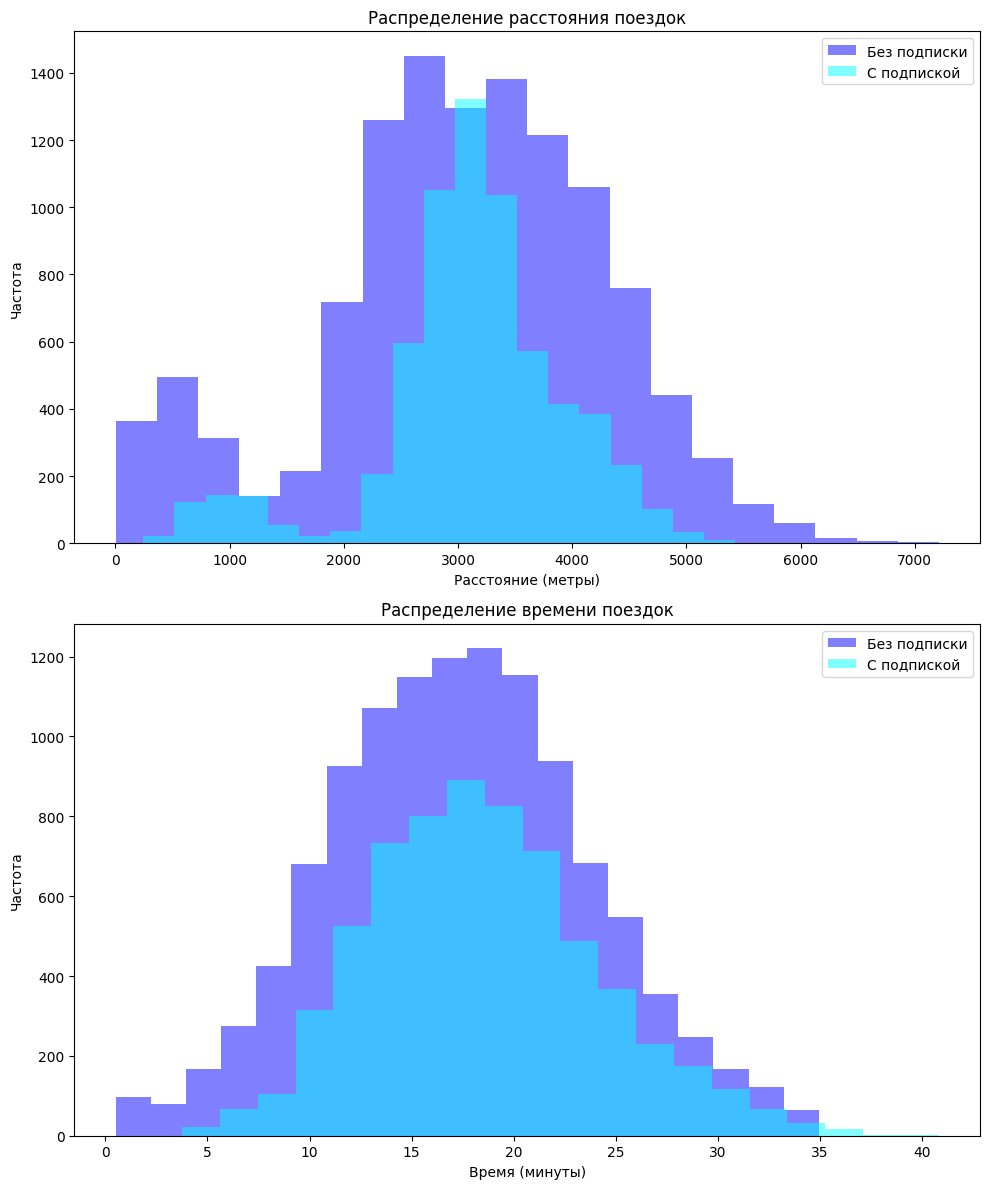

In [25]:
# Получаем статистические метрики для каждой группы
desc_without_sub_distance = df_users_without_subscription['distance'].describe()
desc_with_sub_distance = df_users_with_subscription['distance'].describe()
desc_without_sub_duration = df_users_without_subscription['duration'].describe()
desc_with_sub_duration = df_users_with_subscription['duration'].describe()

# Создаем таблицу с помощью библиотеки tabulate
table = [['Метрика'] + list(desc_without_sub_distance.index)] 
table.append(['Расстояние (без подписки)'] + list(desc_without_sub_distance.values))
table.append(['Расстояние (с подпиской)'] + list(desc_with_sub_distance.values))
table.append(['Время (без подписки)'] + list(desc_without_sub_duration.values))
table.append(['Время (с подпиской)'] + list(desc_with_sub_duration.values))

# Выводим таблицу
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid', floatfmt='.2f'))


# Создание полотна с двумя графиками
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Визуализация распределения расстояния поездок
axes[0].hist(df_users_without_subscription['distance'], bins=20, alpha=0.5, color='blue', label='Без подписки')
axes[0].hist(df_users_with_subscription['distance'], bins=20, alpha=0.5, color='cyan', label='С подпиской')
axes[0].set_title('Распределение расстояния поездок')
axes[0].set_xlabel('Расстояние (метры)')
axes[0].set_ylabel('Частота')
axes[0].legend()


# Визуализация распределения времени поездок
axes[1].hist(df_users_without_subscription['duration'], bins=20, alpha=0.5, color='blue', label='Без подписки')
axes[1].hist(df_users_with_subscription['duration'], bins=20, alpha=0.5, color='cyan', label='С подпиской')
axes[1].set_title('Распределение времени поездок')
axes[1].set_xlabel('Время (минуты)')
axes[1].set_ylabel('Частота')
axes[1].legend()

# Установка автоматического выравнивания полей и межосевого расстояния
plt.tight_layout()

# Показать графики
plt.show()


## Вывод

#### Расстояние поездок:
- Для пользователей без подписки среднее расстояние поездки составляет около 3045.50 метров с стандартным отклонением 1246.17 метров. Это означает, что большинство поездок для этих пользователей находится в промежутке от примерно 1800 метров до 4290 метров (среднее +/- стандартное отклонение);
- Для пользователей с подпиской среднее расстояние поездки составляет около 3115.45 метров со стандартным отклонением 836.90 метров. Здесь большинство поездок для пользователей с подпиской варьируется от примерно 2278 до 3952 метров.
Пользователи с подпиской в среднем проезжают чуть больше, но их расстояния более концентрированы вокруг среднего значения, в отличие от пользователей без подписки, у которых расстояния варьируются шире.

#### Время поездок:
- Для пользователей без подписки среднее время поездки составляет около 17.39 минут с стандартным отклонением 6.33 минут. Это означает, что большинство поездок для этих пользователей длится от примерно 11 до 24 минут;
- Для пользователей с подпиской среднее время поездки составляет около 18.54 минут со стандартным отклонением 5.57 минут. Таким образом, большинство поездок для этих пользователей длится от примерно 13 до 24 минут.
Пользователи с подпиской проводят на поездках немного больше времени, но, как и в случае с расстоянием, время их поездок более концентрировано вокруг среднего значения, в отличие от пользователей без подписки, у которых время варьируется шире.

Выводы: Подписчики сервиса 'GoFast' в среднем делают более длинные поездки как по времени, так и по расстоянию, чем пользователи без подписки. Однако, их поездки обычно более стабильны и предсказуемы, в то время как у пользователей без подписки больший разброс по параметрам. Это может быть связано с тем, что подписчики чаще используют сервис и имеют более устоявшиеся маршруты.

<a id="Этап_5"></a>

## Шаг 5. Подсчёт выручки

<a id="Агрегируем"></a>

#### 5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными. Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

[Вернуться к задачам исследования](#Задачи_исследования)

In [26]:
df_aggregated = df.groupby(['name', 'month']).agg({'distance': 'sum', 'duration': 'sum', 'user_id': 'count'}).reset_index()
df_aggregated.rename(columns={'user_id': 'trip_count'}, inplace=True)
df_aggregated


,name,month,distance,duration,trip_count
0,Агата,April,24862.22,154.47,9
1,Агата,August,9975.89,65.55,3
2,Агата,December,19086.70,123.44,7
3,Агата,February,16813.64,91.91,6
4,Агата,January,21576.31,155.77,7
...,...,...,...,...,...
2295,Ясмина,March,18635.88,134.00,6
2296,Ясмина,May,6516.01,26.56,2
2297,Ясмина,November,6914.70,31.38,3
2298,Ясмина,October,5746.70,30.89,2


<a id="Кэш"></a>

#### 5.2 Добавим в этот же датафрейм столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлим до следующего целого числа.

[Вернуться к задачам исследования](#Задачи_исследования)

In [27]:
# Создание копии исходного датафрейма для модификации
df_with_revenue = df.copy()

# Округление продолжительности поездки до следующего целого числа
df_with_revenue['rounded_duration'] = np.ceil(df_with_revenue['duration']).astype(int)

# Расчет выручки для пользователей с подпиской
df_with_revenue.loc[df_with_revenue['subscription_type'] == 'ultra', 'revenue'] = (
    df_with_revenue['rounded_duration'] * df_with_revenue['minute_price'] +
    df_with_revenue['start_ride_price'] +
    df_with_revenue['subscription_fee']
)

# Расчет выручки для пользователей без подписки
df_with_revenue.loc[df_with_revenue['subscription_type'] == 'free', 'revenue'] = (
    df_with_revenue['rounded_duration'] * df_with_revenue['minute_price'] +
    df_with_revenue['start_ride_price']
)

# Группировка по пользователям и месяцам, вычисление суммарной выручки
df_revenue_aggregated = df_with_revenue.groupby(['name', 'month']).agg({'revenue': 'sum'}).reset_index()

# Объединение с датафреймом агрегированных данных о поездках
df_aggregated_with_revenue = pd.merge(df_aggregated, df_revenue_aggregated, on=['name', 'month'])

df_aggregated_with_revenue.head()


,name,month,distance,duration,trip_count,revenue
0,Агата,April,24862.22,154.47,9,2630.00
1,Агата,August,9975.89,65.55,3,787.00
2,Агата,December,19086.70,123.44,7,1822.00
3,Агата,February,16813.64,91.91,6,1526.00
4,Агата,January,21576.31,155.77,7,2353.00


<a id="Этап_6"></a>

## Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

<a id="Гипотеза_1"></a>

#### 6.1 Нужно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

- H0 (нулевая гипотеза): Пользователи с подпиской не тратят больше времени на поездки;
- H1 (альтернативная гипотеза): Пользователи с подпиской тратят больше времени на поездки.

[Вернуться к задачам исследования](#Задачи_исследования)

Для проверки гипотезы о том, тратят ли пользователи с подпиской больше времени на поездки, мы используем t-тест для независимых выборок. Этот тест сравнивает средние значения двух групп и определяет, является ли различие между ними статистически значимым.

#### 1. Разделение данных на две группы

* Мы разделяем данные на две группы: пользователи с подпиской и пользователи без подписки. Для каждой группы мы рассматриваем продолжительность поездок.

#### 2. Проверка предположений t-теста

Перед применением $t-теста$ мы должны проверить два его основных предположения: нормальность распределения и равенство дисперсий.

Нормальность распределения проверяется с помощью теста Шапиро-Уилка. Нулевая гипотеза этого теста состоит в том, что данные распределены нормально. Если $p-value > 0.05$, мы не отвергаем нулевую гипотезу и считаем, что данные распределены нормально.

Математическая формула теста Шапиро-Уилка выглядит так:
$$ W = \frac{(\sum_{i} a_i x_i)^2}{\sum_{i} (x_i - \bar{x})^2} $$

где:

* $x(i)$ – значения вариационного ряда;
* $a(i)$ – ожидаемые значения стандартного нормального распределения;
* $\bar{x}$ – среднее арифметическое.


Равенство дисперсий проверяется с помощью теста Левена. Нулевая гипотеза этого теста состоит в том, что дисперсии двух групп равны. Если $p-value > 0.05$, мы не отвергаем нулевую гипотезу и считаем, что дисперсии равны.

Формула теста Левена такова:
$$ W = \frac{(N - K)}{(K - 1)} \cdot \frac{\sum (Y_j - N \bar{Y})^2}{\sum \sum (Y_{ij} - Y_j)^2} $$

где:

* $Yj$ – среднее группы j;
* $\bar{Y}$ – общее среднее;
* $Yij$ – i-тое наблюдение j-й группы;
* $N$ – общее число наблюдений;
* $k$ – число групп.

#### 3. Тест Манна-Уитни

Перед проведением t-теста, проведем тест Манна-Уитни - это непараметрический аналог t-теста, используется для проверки равенства медиан двух независимых выборок.

Статистика теста Манна-Уитни имеет следующий вид:
$$ U = n_1 n_2 + \frac{n_1(n_1 + 1)}{2} - R_1 $$

где:

* $n1$ и $n2$ – размеры сравниваемых выборок;
* $R1$ – ранговая сумма для первой выборки.


#### 4. Проведение t-теста

t-тест проводится по следующей формуле:

$$ t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$

где:

- $ \bar{X}_1 $ и $ \bar{X}_2 $ - это средние значения двух групп;
- $ ( s_1^2 ) $ и $ ( s_2^2 ) $ - это дисперсии двух групп;
- $ ( n_1 ) $ и $( n_2 ) $ - это размеры двух групп.

Результат теста Шапиро-Уилка для группы с подпиской
ShapiroResult(statistic=0.9898198843002319, pvalue=3.0510050003555167e-21)

Результат теста Шапиро-Уилка для группы с без подписки
ShapiroResult(statistic=0.9979637861251831, pvalue=2.665247016142569e-11)

Результат теста Левена на равенство диспресий для двух групп
LeveneResult(statistic=135.54328697666747, pvalue=3.246265173544774e-31)

Результат теста теста Манна-Уитни для двух групп
Statistics=41283271.000, p=0.000

Результат t-теста для двух групп
t_stat=12.241, p_val=0.000

Среднее значение (математическое ожидание) для подписчиков:  18.54198516280583
Среднее значение (математическое ожидание) для неподписчиков:  17.39090929866399
Отвергаем нулевую гипотезу, пользователи с подпиской тратят больше времени на поездки


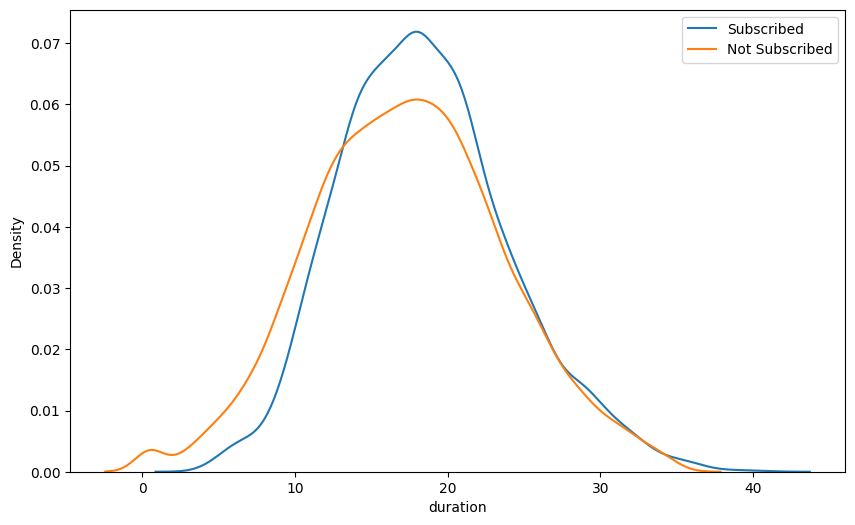

In [28]:
# Разделим данные на две группы: с подпиской и без подписки
subscribed = df[df['subscription_type'] == 'ultra']['duration']
not_subscribed = df[df['subscription_type'] == 'free']['duration']

# # Проверим нормальность распределения с помощью теста Шапиро-Уилка
# # Если p-value > 0.05, то данные распределены нормально

print('Результат теста Шапиро-Уилка для группы с подпиской')
print(stats.shapiro(subscribed))
print('\nРезультат теста Шапиро-Уилка для группы с без подписки')
print(stats.shapiro(not_subscribed))

# # Проверим равенство дисперсий с помощью теста Левена
# # Если p-value > 0.05, то дисперсии равны

print('\nРезультат теста Левена на равенство диспресий для двух групп')
print(stats.levene(subscribed, not_subscribed))


# # Проведем тест Манна-Уитни
print('\nРезультат теста теста Манна-Уитни для двух групп')
stat, p = mannwhitneyu(subscribed, not_subscribed)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Проведем t-тест
# Если p-value < 0.05, то различие между группами статистически значимо
print('\nРезультат t-теста для двух групп')
t_stat, p_val_ttest = stats.ttest_ind(subscribed, not_subscribed, equal_var=True)
print('t_stat=%.3f, p_val=%.3f' % (t_stat, p_val_ttest))

print('\nСреднее значение (математическое ожидание) для подписчиков: ', subscribed.mean())
print('Среднее значение (математическое ожидание) для неподписчиков: ', not_subscribed.mean())

# Если p-значение меньше 0.05, то мы отвергаем нулевую гипотезу о том, что пользователи с подпиской не тратят больше времени на поездки
if p_val_ttest < 0.05:
    print("Отвергаем нулевую гипотезу, пользователи с подпиской тратят больше времени на поездки")
else:
    print("Не отвергаем нулевую гипотезу, пользователи с подпиской не тратят больше времени на поездки")

# Визуализация
plt.figure(figsize=(10,6))
sns.kdeplot(subscribed, label='Subscribed')
sns.kdeplot(not_subscribed, label='Not Subscribed')
plt.legend()
plt.show()

### Вывод

Исходя из результатов наших статистических тестов и средних значений, можно сделать следующие выводы:

<!--  - Тест Шапиро-Уилка показывает, что данные в обеих группах не распределены нормально (p-value меньше 0.05);

- Тест Левена показывает, что дисперсии в двух группах не равны (p-value меньше 0.05);

- Тест Манна-Уитни показывает, что распределения двух групп различаются (p-value меньше 0.05); -->

- t-тест показывает, что средние значения в двух группах различаются (p-value меньше 0.05);

<!-- - Среднее значение продолжительности сессии для подписчиков больше, чем для неподписчиков (18.54 против 17.39). -->

Исходя из полученных результатов, отвергается нулевая гипотеза о том, что пользователи с подпиской не проводят больше времени на поездках по сравнению с пользователями без подписки. Это подтверждает альтернативную гипотезу о том, что пользователи с подпиской действительно проводят больше времени на поездках. Такое наблюдение может указывать на то, что подписчики могут быть более выгодными для компании.

<a id="Гипотеза_2"></a>

#### 6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим эту гипотезу и сделаем вывод.

- H0 (нулевая гипотеза): Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров;
- H1 (альтернативная гипотеза): Расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.

[Вернуться к задачам исследования](#Задачи_исследования)

In [29]:
# Выберем только пользователей с подпиской
subscribed = df[df['subscription_type'] == 'ultra']

# Проведем одновыборочный t-тест
t_stat, p_val = stats.ttest_1samp(subscribed['distance'], 3130)

print(f"t-статистика: {t_stat}, p-значение: {p_val}")

# Если p-значение меньше 0.05, то мы отвергаем нулевую гипотезу о том, что среднее значение равно 3130 метров
if p_val < 0.05:
    print("Отвергаем нулевую гипотезу, среднее значение расстояния, которое проезжают пользователи с подпиской за одну поездку, не равно 3130 метров")
else:
    print("Не отвергаем нулевую гипотезу, среднее значение расстояния, которое проезжают пользователи с подпиской за одну поездку, может быть равно 3130 метров")


t-статистика: -1.402123166869486, p-значение: 0.16092623043004292
Не отвергаем нулевую гипотезу, среднее значение расстояния, которое проезжают пользователи с подпиской за одну поездку, может быть равно 3130 метров


#### Вывод

При проведении анализа не обнаружены достаточные доказательства для отвержения нулевой гипотезы, согласно которой среднее значение расстояния, которое проезжают пользователи с подпиской за одну поездку, может быть равно 3130 метров.

<a id="Гипотеза_3"></a>

#### 6.3. Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

- H0 (нулевая гипотеза): Помесячная выручка от пользователей с подпиской и без подписки одинакова;
- H1 (альтернативная гипотеза): Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

[Вернуться к задачам исследования](#Задачи_исследования)

In [30]:
# Рассчитаем общую выручку для пользователей без подписки
df_users_without_subscription['total_revenue'] = df_users_without_subscription['minute_price'] * df_users_without_subscription['duration'] + df_users_without_subscription['start_ride_price']

# Рассчитаем общую выручку для пользователей с подпиской
df_users_with_subscription['total_revenue'] = df_users_with_subscription['minute_price'] * df_users_with_subscription['duration'] + df_users_with_subscription['start_ride_price'] + df_users_with_subscription['subscription_fee']

# Группируем данные по месяцам и суммируем выручку
monthly_revenue_without_subscription = df_users_without_subscription.groupby('month')['total_revenue'].sum()
monthly_revenue_with_subscription = df_users_with_subscription.groupby('month')['total_revenue'].sum()

# t-test
t_stat, p_value = stats.ttest_ind(monthly_revenue_with_subscription, monthly_revenue_without_subscription)

print(f't-statistic: {t_stat}, p-value: {p_value}')

# Если p-значение меньше 0.05, то мы отвергаем нулевую гипотезу о равенстве помесячной выручки от пользователей с подпиской и без подписки
if p_val_ttest < 0.05:
    print("Отвергаем нулевую гипотезу, помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки")
else:
    print("Не отвергаем нулевую гипотезу, помесячная выручка от пользователей с подпиской и без подписки одинакова")

t-statistic: -3.4680049462234295, p-value: 0.0021854499028343926
Отвергаем нулевую гипотезу, помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки


#### Вывод

- Значение p-value (0.002) меньше обычного уровня значимости 0.05, что говорит о том, что мы можем отклонить нулевую гипотезу о равенстве средних. Это означает, что помесячная выручка от пользователей с подпиской и без подписки статистически значимо различается;

- Значение t-статистики отрицательное (-3.47), что указывает на то, что средняя выручка от пользователей без подписки в месяц выше, чем от пользователей с подпиской.

Исходя из анализа данных, отвергается нулевая гипотеза о том, что помесячная выручка от пользователей с подпиской и без подписки одинакова. Вместо этого, на основании полученных данных, можно сделать вывод о том, что помесячная выручка от пользователей без подписки больше, чем от пользователей с подпиской.

<a id="Гипотеза_5"></a>

#### 6.5. Есть следующая ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

[Вернуться к задачам исследования](#Задачи_исследования)

#### Наиболее подходящим статистическим тестом для проверки нашей гипотезы о том, что обновление серверов привело к снижению количества обращений в техподдержку, будет парный t-тест (или t-тест зависимых выборок).

Парный t-тест используется для сравнения двух связанных выборок с целью определения, есть ли статистически значимые различия между их средними значениями. В нашем случае, две связанные выборки - это количество обращений в техподдержку от каждого пользователя до обновления серверов и после обновления.

Этот тест будет проверять нулевую гипотезу (H0), что среднее количество обращений в техподдержку до и после обновления не отличается, против альтернативной гипотезы (H1), что среднее количество обращений в техподдержку после обновления снизилось.

Если p-значение (вероятность того, что данные, когда нулевая гипотеза верна, дадут текущий результат или еще более экстремальный) полученное в ходе t-теста, будет меньше выбранного уровня значимости (обычно 0.05), то можно отвергнуть нулевую гипотезу и принять альтернативную - что обновление серверов привело к статистически значимому снижению обращений в техподдержку.

#### В дополнение к парному t-тесту, можно рассмотреть следующие статистические методы:

- Непараметрический тест Уилкоксона для связанных выборок: Это аналог парного t-теста для не нормально распределенных данных или данных с выбросами. Если распределение количества обращений в техподдержку существенно отличается от нормального или содержит выбросы, этот тест может быть более подходящим;

- Дисперсионный анализ (ANOVA): Если у нас есть более двух групп для сравнения (например, если мы обновляли сервера в несколько этапов и хотим сравнить эффективность каждого этапа), то мы можем использовать однофакторный дисперсионный анализ;

- Коэффициент корреляции Пирсона: Если мы хотим измерить степень линейной зависимости между числом обращений до и после обновления, мы можем использовать коэффициент корреляции Пирсона;

- Регрессионный анализ: Это может быть полезным, если у нас есть дополнительные переменные, которые могут влиять на количество обращений в службу поддержки, и мы хотим учесть их в своей модели.

## Общий вывод

По результатам исследования сервиса аренды самокатов "GoFast" были сделаны следующие выводы:

- Пользователи в среднем преодолевают расстояние около 36.2 км за одну поездку, с разбросом данных от 5.5 до 79.3 км. Время поездок в среднем составляет 209 минут, с разбросом от 34 до 446 минут;

- Пользователи с подпиской в среднем проезжают больше и проводят на поездках больше времени, чем пользователи без подписки. Однако, их поездки более стабильны и предсказуемы;

- Пользователи без подписки имеют больший разброс в своих поездках как по времени, так и по расстоянию, что может свидетельствовать о более случайном или нерегулярном использовании сервиса;

- Несмотря на то, что пользователи с подпиской в среднем делают более длинные поездки, помесячная выручка от пользователей без подписки оказалась больше, что может быть связано с различными тарифами или использованием сервиса в более пиковые периоды.

Общий вывод: Исследование показывает, что поведение пользователей сервиса "GoFast" в значительной степени зависит от наличия у них подписки. Подписчики используют сервис более регулярно и предсказуемо, в то время как пользователи без подписки — более случайно и нерегулярно, но при этом приносят больше дохода компании.

На основе этих данных, рекомендуется компании "GoFast":

- Разработать стратегии стимулирования пользователей без подписки к переходу на подписные планы. Это может включать в себя скидки, гибкие подписки или другие бонусы;

- Улучшить условия для текущих подписчиков, чтобы увеличить их активность и увеличить среднее расстояние и время их поездок;

- Продолжать проводить анализ данных для отслеживания изменений в поведении пользователей и корректировки стратегий взаимодействия с ними.